/tmp/ipykernel_3363/435505732.py:32: RuntimeWarning: invalid value encountered in true_divide
  return (np.sin(x-beta(x))/np.sin(x+beta(x)))**2
/tmp/ipykernel_3363/435505732.py:38: RuntimeWarning: invalid value encountered in true_divide
  return (np.tan(x-beta(x))/np.tan(x+beta(x)))**2


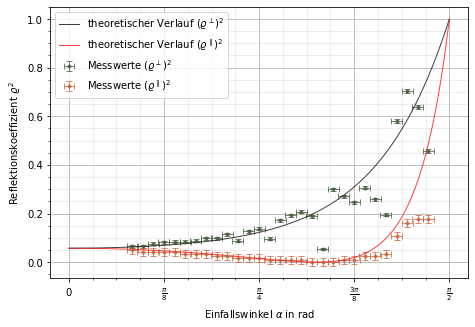

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import curve_fit

input = 'V23.txt'

xo = np.loadtxt(input, float, usecols=0, skiprows=5, delimiter=',')
U0t = np.loadtxt(input, float, usecols=1, skiprows=5, delimiter=',')
U90t = np.loadtxt(input, float, usecols=2, skiprows=5, delimiter=',')

Uzero = 0.02
U0ref = 3.305 + Uzero
U90ref = 1.209 + Uzero
U0 = U0t + Uzero
U90 = U90t + Uzero
rho0sqrd = U0 / U0ref
rho90sqrd = U90 / U90ref
Uerr = 0.02
rho0sqrderr = ((Uerr / U0ref)**2 + (Uerr * U0 / U0ref**2)**2)**(1/2)
rho90sqrderr = ((Uerr / U90ref)**2 + (Uerr * U90 / U90ref**2)**2)**(1/2)

x = (90 - ( xo / 2 ))/180*np.pi
xerr = 1.3/180*np.pi


def beta(x):
    return np.arcsin(np.sin(x)/1.63)

def f1(x):
    return (np.sin(x-beta(x))/np.sin(x+beta(x)))**2

#def f1err(a):
#    return xerr*(1 - 0.613496932515337*np.cos(a)/np.sqrt(1 - 0.376378486205729*np.sin(a)**2))*np.cos(a - np.arcsin(0.613496932515337*np.sin(a)))/np.sin(a + np.arcsin(0.613496932515337*np.sin(a))) - (1 + 0.613496932515337*np.cos(a)/np.sqrt(1 - 0.376378486205729*np.sin(a)**2))*np.sin(a - np.arcsin(0.613496932515337*np.sin(a)))*np.cos(a + np.arcsin(0.613496932515337*np.sin(a)))/np.sin(a + np.arcsin(0.613496932515337*np.sin(a)))**2

def f2(x):
    return (np.tan(x-beta(x))/np.tan(x+beta(x)))**2

#def f2err(a):
#    return xerr*abs(1 - 0.613496932515337*np.cos(a)/np.sqrt(1 - 0.376378486205729*np.sin(a)**2))*(np.tan(a - np.arcsin(0.613496932515337*np.sin(a)))**2 + 1)/np.tan(a + np.arcsin(0.613496932515337*np.sin(a))) - (1 + 0.613496932515337*np.cos(a)/np.sqrt(1 - 0.376378486205729*np.sin(a)**2))*(np.tan(a + np.arcsin(0.613496932515337*np.sin(a)))**2 + 1)*np.tan(a - np.arcsin(0.613496932515337*np.sin(a)))/np.tan(a + np.arcsin(0.613496932515337*np.sin(a)))**2

fig, ax = plt.subplots(figsize=(7.5,5))
xplot_1 = np.linspace(0, np.pi/2, 10000)

ax.set_xlabel(r'Einfallswinkel $\alpha$ in rad')
ax.set_ylabel(r'Reflektionskoeffizient $\varrho^2$')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.errorbar(x, rho0sqrd, xerr = xerr, yerr = rho0sqrderr, fmt = '.', color = '#465d3e', alpha = 0.75, linewidth=1, ecolor="#465d3e", capsize=3, label = r'Messwerte $(\varrho^\perp)^2$')
ax.errorbar(x, rho90sqrd, xerr = xerr, yerr = rho90sqrderr, fmt = '.', color = '#cb6640', alpha = 0.75, linewidth=1, ecolor="#cb6640", capsize=3, label = r'Messwerte $(\varrho^\parallel)^2$')
ax.plot(xplot_1, f1(xplot_1), color = 'black', alpha = 0.75, linewidth = 1, label = r'theoretischer Verlauf $(\varrho^\perp)^2$')
#plt.fill_between(xplot_1, f1(xplot_1)-f1err(xplot_1), f1(xplot_1)+f1err(xplot_1), color = 'black', alpha = 0.25)
ax.plot(xplot_1, f2(xplot_1), color = 'red', alpha = 0.75, linewidth = 1, label = r'theoretischer Verlauf $(\varrho^\parallel)^2$')
#plt.fill_between(xplot_1, f2(xplot_1)-f2err(xplot_1), f2(xplot_1)+f2err(xplot_1), color = [200/255,60/255,40/255], alpha = 0.25)
plt.xticks([0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2],[r'$0$',r'$\frac{\pi}{8}$',r'$\frac{\pi}{4}$',r'$\frac{3\pi}{8}$',r'$\frac{\pi}{2}$'])
ax.legend()
plt.savefig('', facecolor = 'white', bbox_inches='tight')
plt.show()

/tmp/ipykernel_3363/3476698584.py:14: RuntimeWarning: invalid value encountered in true_divide
  return value * x / x


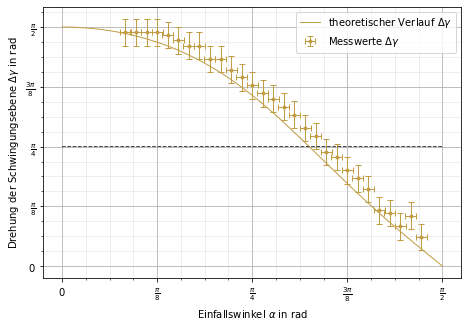

In [6]:
theta = np.loadtxt(input, float, usecols=3, skiprows=5, delimiter=',') / 180 * np.pi
thetaerr = 5/360*2*np.pi

deltagamma = ((3 / 4) * np.pi - theta) % np.pi
deltagammaerr = thetaerr

fig, ax = plt.subplots(figsize=(7.5,5))
xplot_1 = np.linspace(0, np.pi/2, 10000)

def deltagammatheo(x):
    return (np.arctan( -np.cos(x - beta(x)) / np.cos(x + beta(x))) - (np.pi / 4)) % (np.pi) 

def constant(x, value):
    return value * x / x

ax.set_xlabel(r'Einfallswinkel $\alpha$ in rad')
ax.set_ylabel(r'Drehung der Schwingungsebene $\Delta\gamma$ in rad')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.errorbar(x, deltagamma, xerr = xerr, yerr = deltagammaerr, fmt = '.', color = '#c19d44', alpha = 1, linewidth=1, ecolor="#c19d44", capsize=3, label = r'Messwerte $\Delta\gamma$')
ax.plot(xplot_1, deltagammatheo(xplot_1), color = '#c19d44', alpha = 1, linewidth = 1, label = r'theoretischer Verlauf $\Delta\gamma$')
#plt.fill_between(xplot_1, f1(xplot_1)-f1err(xplot_1), f1(xplot_1)+f1err(xplot_1), color = 'black', alpha = 0.25)
ax.plot(xplot_1, constant(xplot_1, np.pi / 4), color = 'black', alpha = 0.75, linewidth = 1, linestyle = 'dashed', label = r'')
plt.xticks([0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2],[r'$0$',r'$\frac{\pi}{8}$',r'$\frac{\pi}{4}$',r'$\frac{3\pi}{8}$',r'$\frac{\pi}{2}$'])
plt.yticks([0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2],[r'$0$',r'$\frac{\pi}{8}$',r'$\frac{\pi}{4}$',r'$\frac{3\pi}{8}$',r'$\frac{\pi}{2}$'])
ax.legend()
plt.savefig('', facecolor = 'white', bbox_inches='tight')
plt.show()
